In [1]:
# import os
# print(os.getcwd())
# print(os.listdir())

import quantinfo
from input_data import *
import aux



import numpy as np
import math, cmath
import time
# from numpy import linalg as LA
from scipy import linalg as LA
import random

import matplotlib.pyplot as plt
import matplotlib


log_negativity = quantinfo.log_negativity
two_qb_cor = quantinfo.two_qb_cor
two_qb_bloch_vec = quantinfo.two_qb_bloch_vec
two_qb_bloch_cor = quantinfo.two_qb_bloch_cor
mixed_fidelity = quantinfo.mixed_fidelity
rho_init = aux.rho_init
steady_state = aux.steady_state
channel = aux.channel
Kraus_opt = aux.Kraus_opt
completeness = aux.completeness


In [2]:
t_start = time.clock()
# ------------------------------------------------------------------------------------------------
#                                         Quantum trajectories 
#-------------------------------------------------------------------------------------------------
print('--- Trajectory # counter ---')
for k in range(ntraj):
    rho_c = rho_init()    # default is the maxiamlly mixed state a=b=0.0
    purity_c[k,0] = np.trace(rho_c@rho_c)
    fid_c[k,0] = mixed_fidelity(rho_c,steady_state(epsilon))
    log_neg_c[k,0] = log_negativity(rho_c) 
    bloch_v1, bloch_v2 = two_qb_bloch_vec(rho_c)
    x1_c[k,0] = bloch_v1[0]
    y1_c[k,0] = bloch_v1[1]
    z1_c[k,0] = bloch_v1[2]
    x2_c[k,0] = bloch_v2[0]
    y2_c[k,0] = bloch_v2[1]
    z2_c[k,0] = bloch_v2[2]
    
    
    for i in range(counter):
        # ---------------------------------------------------------------------------------------------------
        #        Conditional maps 
        #----------------------------------------------------------------------------------------------------
        # channel[1]: local_maps, channel[2]:joint_maps
        rho_c_u1 = channel[ch](rho_c)[0]
        rho_c_u2 = channel[ch](rho_c)[1]
        rho_c_u3 = channel[ch](rho_c)[2]
        rho_c_u4 = channel[ch](rho_c)[3]
        # -----------------------------------------------------------------------------------------------------
        #     Conditional probabilities (Eqs.(A.3a-d)) 
        #------------------------------------------------------------------------------------------------------
        p_u1 = np.real(np.trace(rho_c_u1))
        p_u2 = np.real(np.trace(rho_c_u2))
        p_u3 = np.real(np.trace(rho_c_u3))
        p_u4 = np.real(np.trace(rho_c_u4))

        # ---------------------------------------------------------------------------------------------------
        #        Conditional maps 
        #----------------------------------------------------------------------------------------------------
        # make a decision by calling a uniform random number in [0,1].
        rand = random.random()
        if rand <= p_u1:    # Result is |u1>
            rho_c = rho_c_u1/p_u1 
        elif p_u1 < rand <= p_u1+p_u2:  # Result is |u2>
            rho_c = rho_c_u2/p_u2 
        elif p_u1+p_u2 < rand <= p_u1+p_u2+p_u3:   # Result is |u3>
            rho_c = rho_c_u3/p_u3 
        else:   # Result is |u4>
            rho_c = rho_c_u4/p_u4 
        purity_c[k,i+1] = np.trace(rho_c@rho_c)
        fid_c[k,i+1] = mixed_fidelity(rho_c,steady_state(epsilon))
        log_neg_c[k,i+1] = log_negativity(rho_c) 
        bloch_v1, bloch_v2 = two_qb_bloch_vec(rho_c)
        x1_c[k,i+1] = bloch_v1[0]
        y1_c[k,i+1] = bloch_v1[1]
        z1_c[k,i+1] = bloch_v1[2]
        x2_c[k,i+1] = bloch_v2[0]
        y2_c[k,i+1] = bloch_v2[1]
        z2_c[k,i+1] = bloch_v2[2]
    
    rho_eq[:,:,k] = rho_c
    print(k)

(time.clock() - t_start)

--- Trajectory # counter ---
0


1635.082999

In [3]:
# purity  = np.zeros(counter+1,dtype=np.complex128)
x1 = np.zeros(counter+1,dtype=np.float64)
y1 = np.zeros(counter+1,dtype=np.float64)
z1 = np.zeros(counter+1,dtype=np.float64)
x2 = np.zeros(counter+1,dtype=np.float64)
y2 = np.zeros(counter+1,dtype=np.float64)
z2 = np.zeros(counter+1,dtype=np.float64)
for k in range(counter+1):
    x1[k] = np.mean(x1_c[:,k])
    y1[k] = np.mean(y1_c[:,k])
    z1[k] = np.mean(z1_c[:,k])
    x2[k] = np.mean(x2_c[:,k])
    y2[k] = np.mean(y2_c[:,k])
    z2[k] = np.mean(z2_c[:,k])
#     purity[k] = np.mean(purity_c[:,k])

In [ ]:
# --- Checking the averaged conditional steady state fidelity ---
rho_ss_avg = np.mean(rho_eq,axis=2)
print(rho_ss_avg)
print(mixed_fidelity(rho_ss_avg,steady_state(epsilon)))  
np.savez('fid_rhoSS.npz',ar1=steady_state(epsilon),ar2=rho_ss_avg,\
         ar3=mixed_fidelity(rho_ss_avg,steady_state(epsilon)))
# print(np.load('fid_rhoSS.npz')['ar3'])

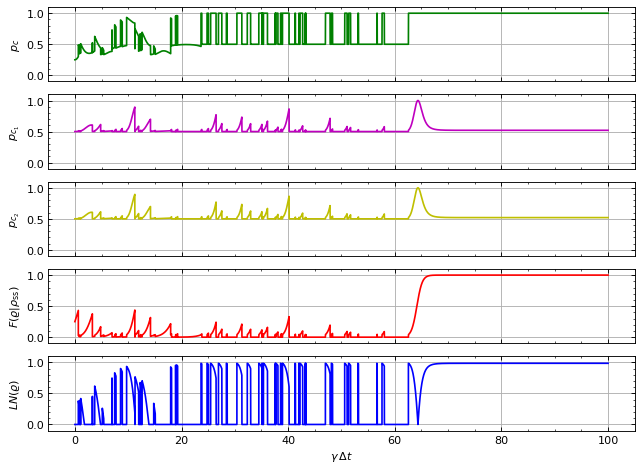

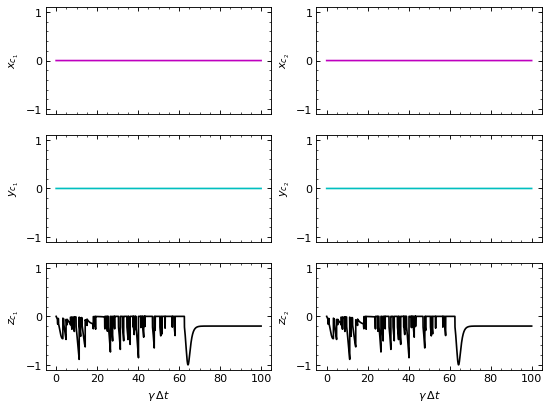

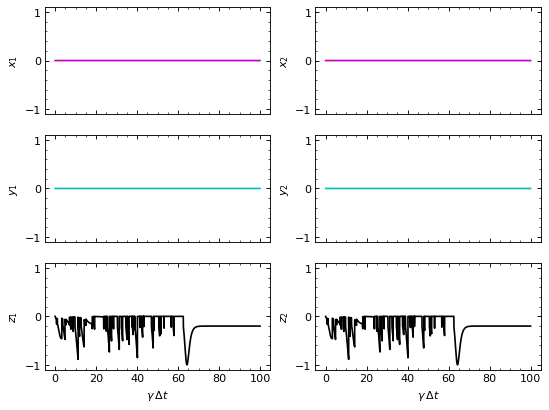

In [4]:
traj_tag = 0
time_win = np.arange(0,np.size(purity_c[traj_tag]))*g1


# --- plotting conditional purities ---
plt.figure(1,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(511)
plt.plot(time_win,np.real(purity_c[traj_tag]),'g')
plt.xlabel('')
plt.ylabel('$p_c$')
plt.ylim((-0.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both',which='both',direction='in',bottom=True,top=True,left=True,right=True,labelbottom=False)
plt.grid(True)

plt.subplot(512)
plt.plot(time_win,0.5*(1.0+x1_c[traj_tag]**2+y1_c[traj_tag]**2+z1_c[traj_tag]**2),'m')
plt.xlabel('')
plt.ylabel('$p_{c_1}$')
plt.ylim((-0.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True,top=True,left=True,right=True,labelbottom=False)
plt.grid(True)

plt.subplot(513)
plt.plot(time_win,0.5*(1.0+x2_c[traj_tag]**2+y2_c[traj_tag]**2+z2_c[traj_tag]**2),'y')
plt.xlabel('')
plt.ylabel('$p_{c_2}$')
plt.ylim((-0.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True,top=True,left=True,right=True,labelbottom=False)
plt.grid(True)

# --- plotting conditional state fidelity wrt S.S. ---
plt.subplot(514)
plt.plot(time_win,np.real(fid_c[traj_tag]),'r')
plt.xlabel('')
plt.ylabel('$F(\\varrho|\\rho_{\\rm ss})$')
plt.ylim((-0.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True,top=True,left=True,right=True,labelbottom=False)
plt.grid(True)

# --- plotting conditional logorithmic negativity ---
plt.subplot(515)
plt.plot(time_win,np.real(log_neg_c[traj_tag]),'b')
plt.xlabel('$\gamma\,\Delta t$')
plt.ylabel('$LN(\\varrho)$')
plt.ylim((-0.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True)
plt.grid(True)


plt.tight_layout()
plt.savefig('dynamics_c.pdf')
plt.show()



# --- plotting conditional Bloch vectors ---

plt.figure(2,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(321)
plt.plot(time_win,x1_c[traj_tag],'m')
plt.xlabel('')
plt.ylabel('$x_{c_1}$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(2,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(323)
plt.plot(time_win,y1_c[traj_tag],'c')
plt.xlabel('')
plt.ylabel('$y_{c_1}$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(2,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(325)
plt.plot(time_win,z1_c[traj_tag],'k')
plt.xlabel('$\gamma\,\Delta t$')
plt.ylabel('$z_{c_1}$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True)

plt.figure(2,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(322)
plt.plot(time_win,x2_c[traj_tag],'m')
plt.xlabel('')
plt.ylabel('$x_{c_2}$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(2,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(324)
plt.plot(time_win,y2_c[traj_tag],'c')
plt.xlabel('')
plt.ylabel('$y_{c_2}$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(2,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(326)
plt.plot(time_win,z2_c[traj_tag],'k')
plt.xlabel('$\gamma\,\Delta t$')
plt.ylabel('$z_{c_2}$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True)

plt.savefig('bloch_vecs_c.pdf')
plt.show()


# --- plotting Bloch vectors ---

plt.figure(3,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(321)
plt.plot(time_win,x1,'m')
plt.xlabel('')
plt.ylabel('$x_1$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(3,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(323)
plt.plot(time_win,y1,'c')
plt.xlabel('')
plt.ylabel('$y_1$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(3,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(325)
plt.plot(time_win,z1,'k')
plt.xlabel('$\gamma\,\Delta t$')
plt.ylabel('$z_1$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True)

plt.figure(3,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(322)
plt.plot(time_win,x2,'m')
plt.xlabel('')
plt.ylabel('$x_2$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(3,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(324)
plt.plot(time_win,y2,'c')
plt.xlabel('')
plt.ylabel('$y_2$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True,labelbottom=False)

plt.figure(3,figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(326)
plt.plot(time_win,z2,'k')
plt.xlabel('$\gamma\,\Delta t$')
plt.ylabel('$z_2$')
plt.ylim((-1.1,1.1))
plt.minorticks_on()
plt.tick_params(axis='both', which='both', direction='in',bottom=True, top=True, left=True, right=True)
# plt.subplots_adjust(wspace=0.25, hspace=0.04)

plt.savefig('bloch_vecs.pdf')
plt.show()




# np.savetxt('pc.txt',np.real(purity_c[traj_tag]))
# np.savetxt('pc1.txt',0.5*(1.0+x1_c[traj_tag]**2+y1_c[traj_tag]**2+z1_c[traj_tag]**2))
# np.savetxt('pc2.txt',0.5*(1.0+x2_c[traj_tag]**2+y2_c[traj_tag]**2+z2_c[traj_tag]**2))
# np.savetxt('fid.txt',np.real(fid_c[traj_tag]))
# np.savetxt('logNg.txt',np.real(log_neg_c[traj_tag]))
# np.savetxt('x1_c.txt',x1_c[traj_tag])
# np.savetxt('y1_c.txt',y1_c[traj_tag])
# np.savetxt('z1_c.txt',z1_c[traj_tag])
# np.savetxt('x2_c.txt',x2_c[traj_tag])
# np.savetxt('y2_c.txt',y2_c[traj_tag])
# np.savetxt('z2_c.txt',z2_c[traj_tag])
# np.savetxt('x1.txt',x1)
# np.savetxt('y1.txt',y1)
# np.savetxt('z1.txt',z1)
# np.savetxt('x2.txt',x2)
# np.savetxt('y2.txt',y2)
# np.savetxt('z2.txt',z2)

In [ ]:
print(traj_tag)
np.set_printoptions(precision=5)
print(np.size(np.real(purity_c[traj_tag])))

In [ ]:
print(p_u1+p_u2+p_u3+p_u4)
print(log_neg_c)
print(rho_ss) 

In [ ]:
print(completeness(name))

In [ ]:
print(epsilon) 
print(counter)
print(ntraj)

In [ ]:
print(a,b)

In [ ]:
print(epsilon)
print(rho_c)
print(steady_state(epsilon))
print(np.trace(steady_state(epsilon)@steady_state(epsilon)))

In [ ]:
print(rho_init())
print(np.trace(rho_init(a,b)))

In [ ]:
print(mixed_fidelity(rho_init(a,b),steady_state(epsilon)))
print(mixed_fidelity(rho_c,steady_state(epsilon)))  
print(mixed_fidelity(0.25*np.identity(4),steady_state(epsilon)))

In [2]:
print(log_negativity(rho_c))
print(log_negativity(rho_init(a,b)))
print(log_negativity(steady_state(epsilon)))

0.0
1.0
0.9853517063653556


In [7]:
traj_tag=0
bloch_v1, bloch_v2 = two_qb_bloch_vec(steady_state(epsilon))
x1_c[0] = bloch_v1[0]
y1_c[0] = bloch_v1[1]
z1_c[0] = bloch_v1[2]
x2_c[0] = bloch_v2[0]
y2_c[0] = bloch_v2[1]
z2_c[0] = bloch_v2[2]

In [8]:
0.5*(1.0+x1_c[traj_tag]**2+y1_c[traj_tag]**2+z1_c[traj_tag]**2)

array([ 0.52,  0.52,  0.52, ...,  0.52,  0.52,  0.52])